In [5]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

UsageError: Line magic function `%tensorflow_version` not found.


In [6]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth = 200)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [7]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#first layer
  model.add(tf.keras.layers.Dense(units= 65, activation= 'tanh'))
   
#second layer
  model.add(tf.keras.layers.Dense(units= 25))


  model.add(tf.keras.layers.Dropout(rate=0.2))


  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                             
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/50
12/12 [==============================] - 1s 49ms/step - loss: 1.5710 - accuracy: 0.4832 - val_loss: 0.5189 - val_accuracy: 0.8518
Epoch 2/50
12/12 [==============================] - 0s 26ms/step - loss: 0.5553 - accuracy: 0.8322 - val_loss: 0.3642 - val_accuracy: 0.8936
Epoch 3/50
12/12 [==============================] - 0s 25ms/step - loss: 0.4159 - accuracy: 0.8757 - val_loss: 0.3084 - val_accuracy: 0.9082
Epoch 4/50
12/12 [==============================] - 0s 29ms/step - loss: 0.3494 - accuracy: 0.8983 - val_loss: 0.2767 - val_accuracy: 0.9177
Epoch 5/50
12/12 [==============================] - 0s 26ms/step - loss: 0.3188 - accuracy: 0.9076 - val_loss: 0.2533 - val_accuracy: 0.9263
Epoch 6/50
12/12 [==============================] - 0s 24ms/step - loss: 0.2842 - accuracy: 0.9192 - val_loss: 0.2350 - val_accuracy: 0.9317
Epoch 7/50
12/12 [==============================] - 0s 25ms/step - loss: 0.2648 - accuracy: 0.9239 - val_loss: 0.2216 - val_accuracy: 0.9367
Epoch 8/50
12

[0.1144229844212532, 0.9715999960899353]

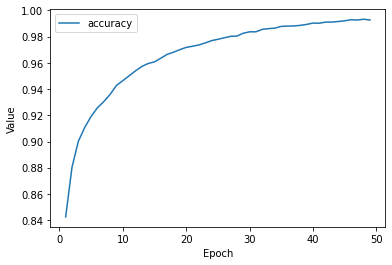

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.004
epochs = 50
batch_size = 4000
validation_split = 0.25

my_model = create_model(learning_rate)

epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

In [9]:
# load and prepare the image
# placeholder image loader while i await sarabs code
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

  #image prediction function
def predict_digit(image):
  # loads the image through the above function
  img = load_image(image)
  #predicts digit from the image as an interger
  prediction = np.argmax(my_model.predict(img), axis=-1).astype("int32")
  # print
  print("Predicted number: ",prediction)

predict_digit('/Users/wyattja1/Desktop/digit_one.jpg')

Predicted number:  [7]
